In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
686,7.15,62.0,1
978,6.78,12.0,0
880,6.40,13.0,0
777,7.67,23.0,0
549,7.37,79.0,1


c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


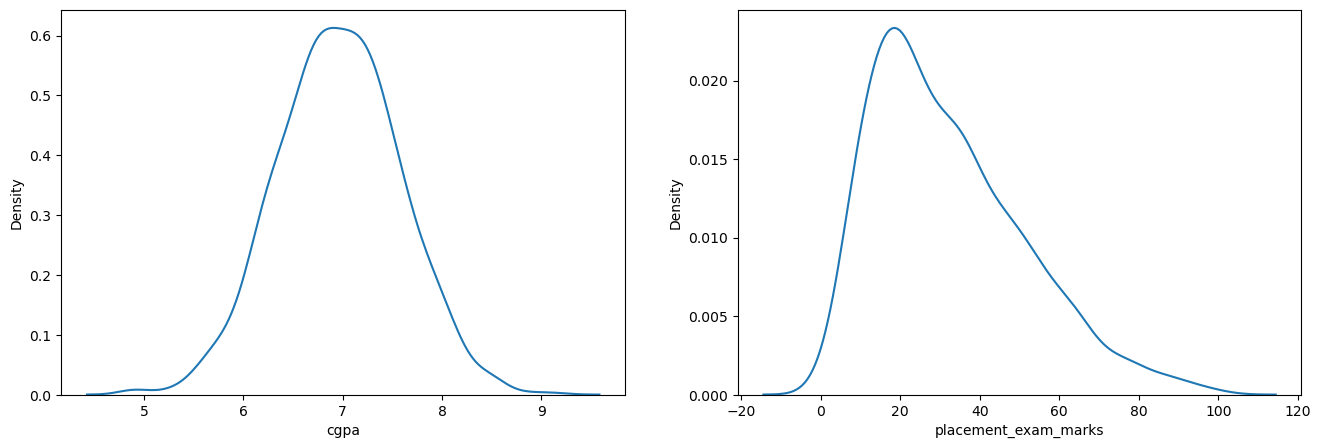

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df['cgpa'])

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.show()

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

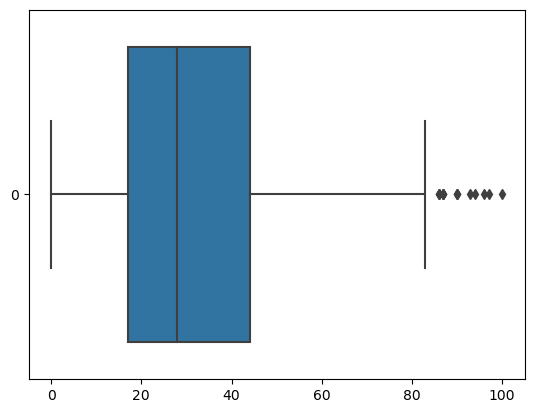

In [19]:
sns.boxplot(df['placement_exam_marks'], orient='h')

In [20]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [24]:
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

upper limit: 84.5
lower limit: -23.5


### finding outliers

In [25]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscre
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [26]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscre


### Trimming

In [31]:
new_df = df[df['placement_exam_marks'] < upper_limit]
print(new_df.head() )
print(new_df.shape)

   cgpa  placement_exam_marks  placed  cgpa_zscre
0  7.19                  26.0       1    0.371425
1  7.46                  38.0       1    0.809810
2  7.54                  40.0       1    0.939701
3  6.42                   8.0       1   -0.878782
4  7.23                  17.0       0    0.436371
(985, 4)


c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


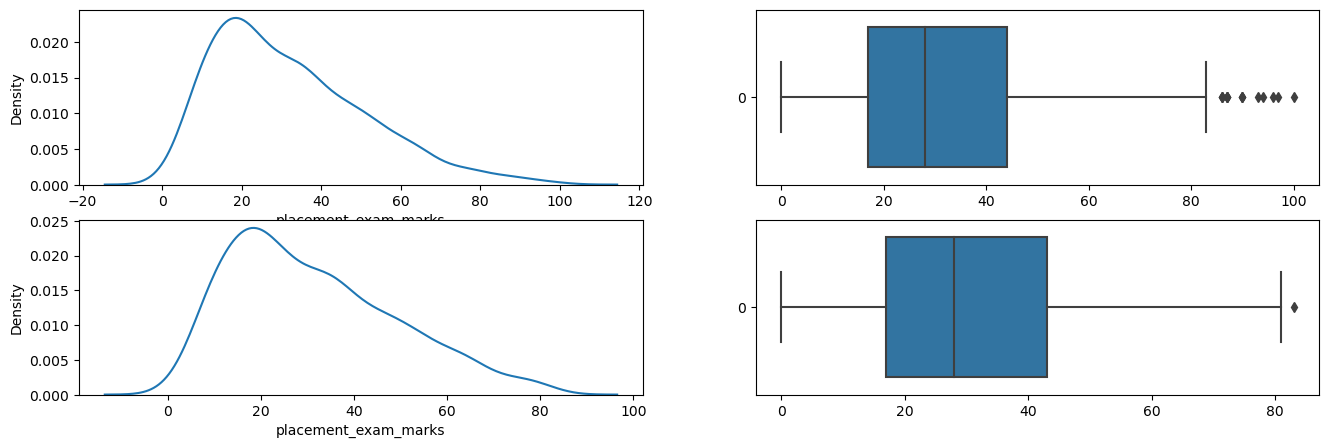

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(223)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'], orient='h')
plt.show()

### Capping

In [35]:
upper_limit, lower_limit

(84.5, -23.5)

In [37]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit, upper_limit, 
    np.where(
        df['placement_exam_marks'] < lower_limit, lower_limit, df['placement_exam_marks']))

In [38]:
new_df_cap.shape

(1000, 4)

In [39]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


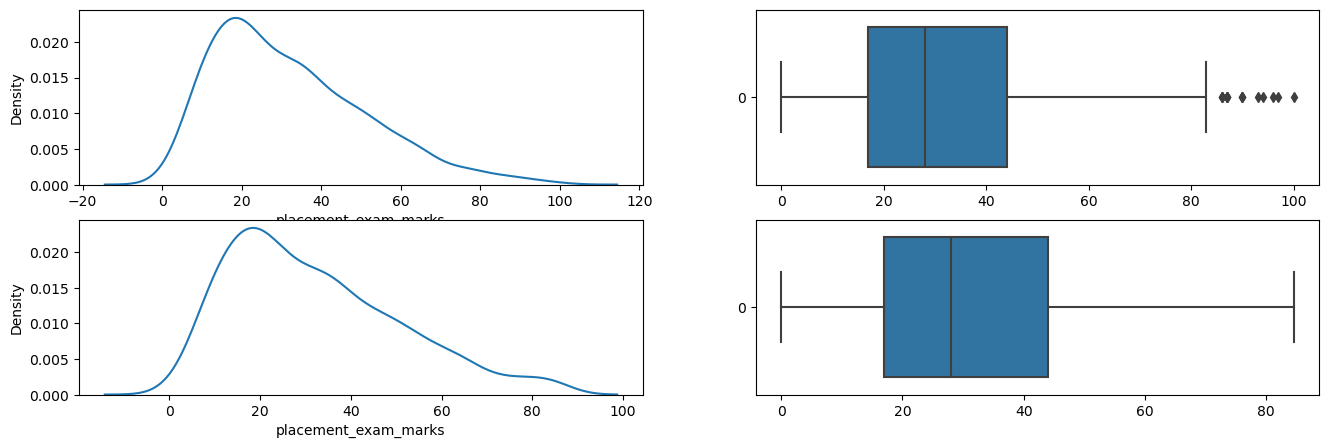

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(223)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'], orient='h')
plt.show()